In [15]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon


plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df['preciousd'] = df['precio']/20

In [3]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

In [11]:
disfed = df[df["provincia"]=="Distrito Federal"]

In [12]:
disfed['preciom2usd'] = disfed['preciousd'] / disfed['metrostotales']

/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
cantidad_props_disfed = disfed.tipodepropiedad.value_counts().to_frame()
cantidad_props_disfed = cantidad_props_disfed.sort_values(by="tipodepropiedad").reset_index()
cantidad_props_disfed = cantidad_props_disfed.rename(columns={"index":"tipo","tipodepropiedad":"cuenta"})

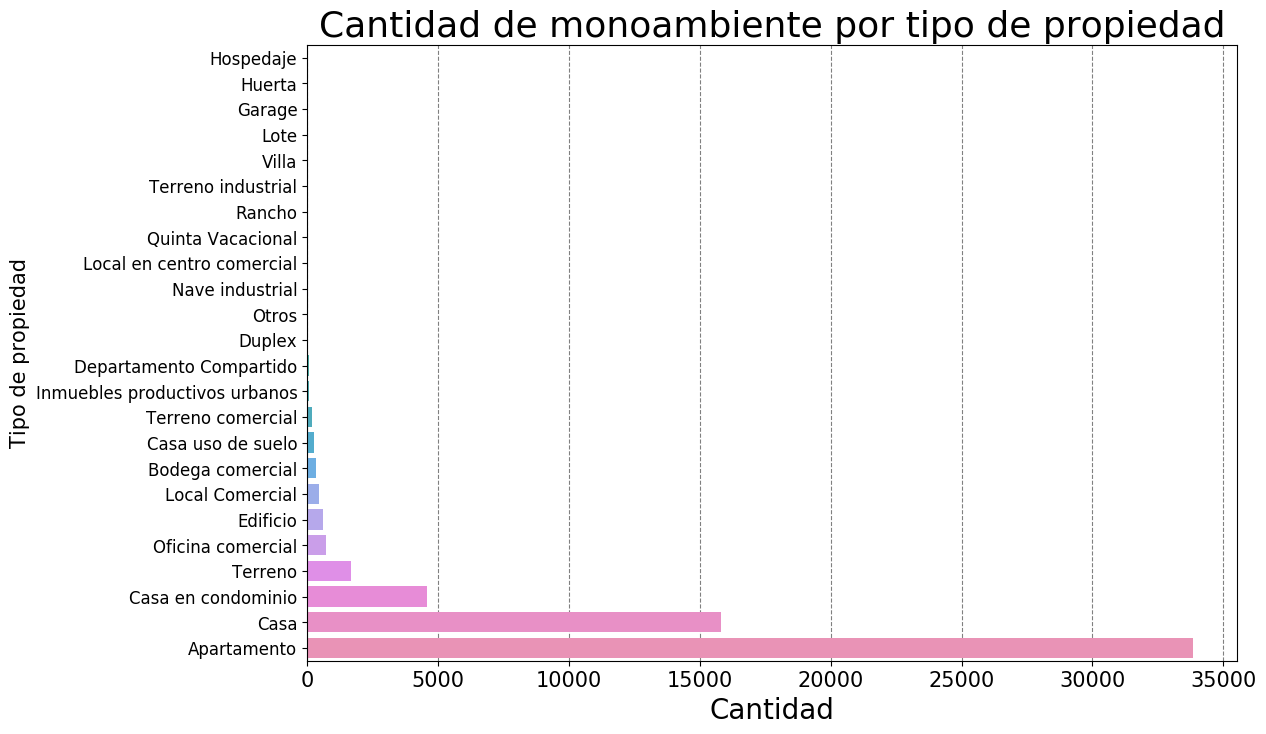

In [16]:
ax = sns.barplot(y=cantidad_props_disfed.tipo, x=cantidad_props_disfed.cuenta, data=cantidad_props_disfed, order=cantidad_props_disfed['tipo'])
ax.set_ylabel('Tipo de propiedad', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('Cantidad de monoambiente por tipo de propiedad', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

Como vimos anteriormente en Distrito federal hay mayor cantidad de apartamentos publicados.

In [54]:
disfed_filter = disfed[~(disfed.ciudad.isnull())]
disfed_filter['ciudad-provincia'] = disfed_filter[['ciudad', 'provincia']].apply(lambda x: ', '.join(x), axis=1)
disfed_agrupado_por_ciudad = disfed_filter.groupby("ciudad-provincia").agg({"id":"count"}).sort_values(by="id",ascending=False).head(15)

/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


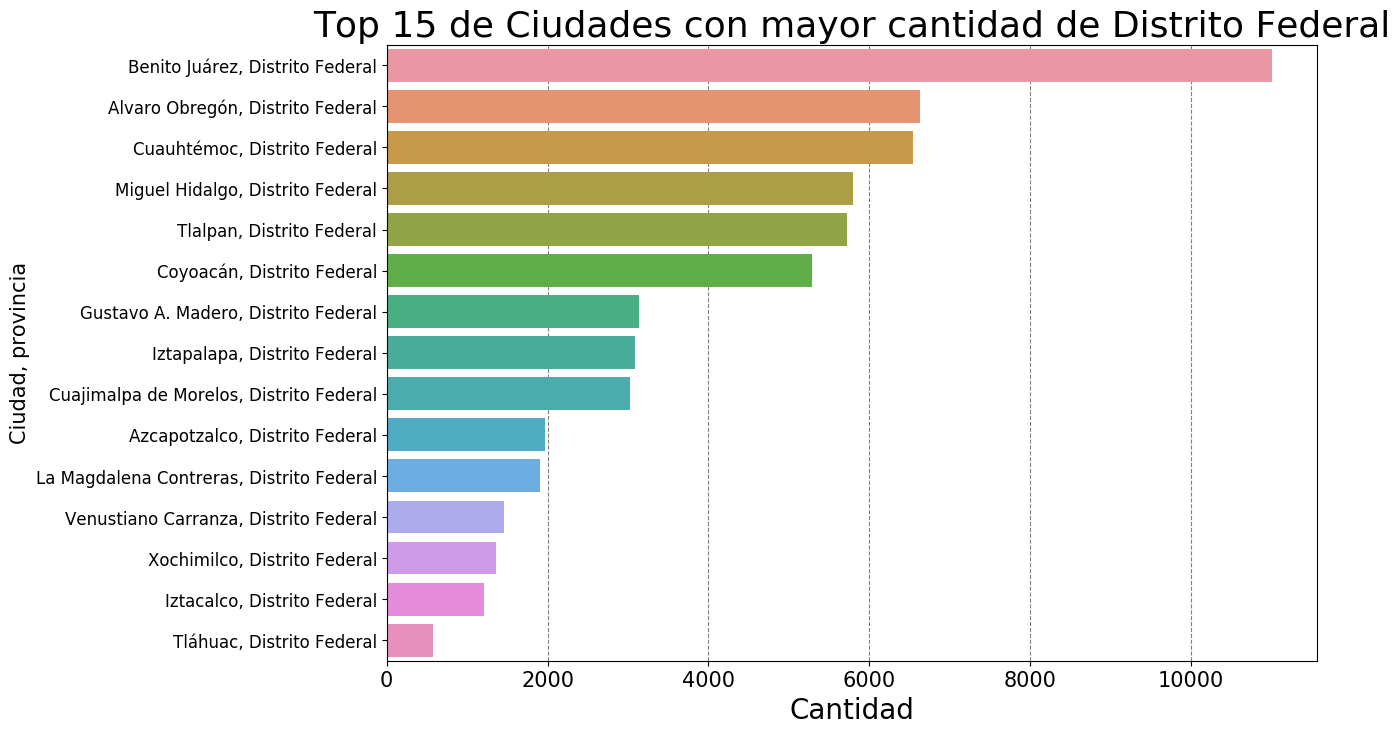

In [55]:
ax = sns.barplot(y=disfed_agrupado_por_ciudad.index, x=disfed_agrupado_por_ciudad.id, order=disfed_agrupado_por_ciudad.index)
ax.set_title('Top 15 de Ciudades con mayor cantidad de Distrito Federal', fontsize=26);
ax.set_ylabel('Ciudad, provincia', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [27]:
disfed_m2_tipo = disfed.groupby("tipodepropiedad").agg({"preciom2usd":"mean"}).sort_values(by= "preciom2usd")
disfed_m2_tipo = disfed_m2_tipo.dropna()

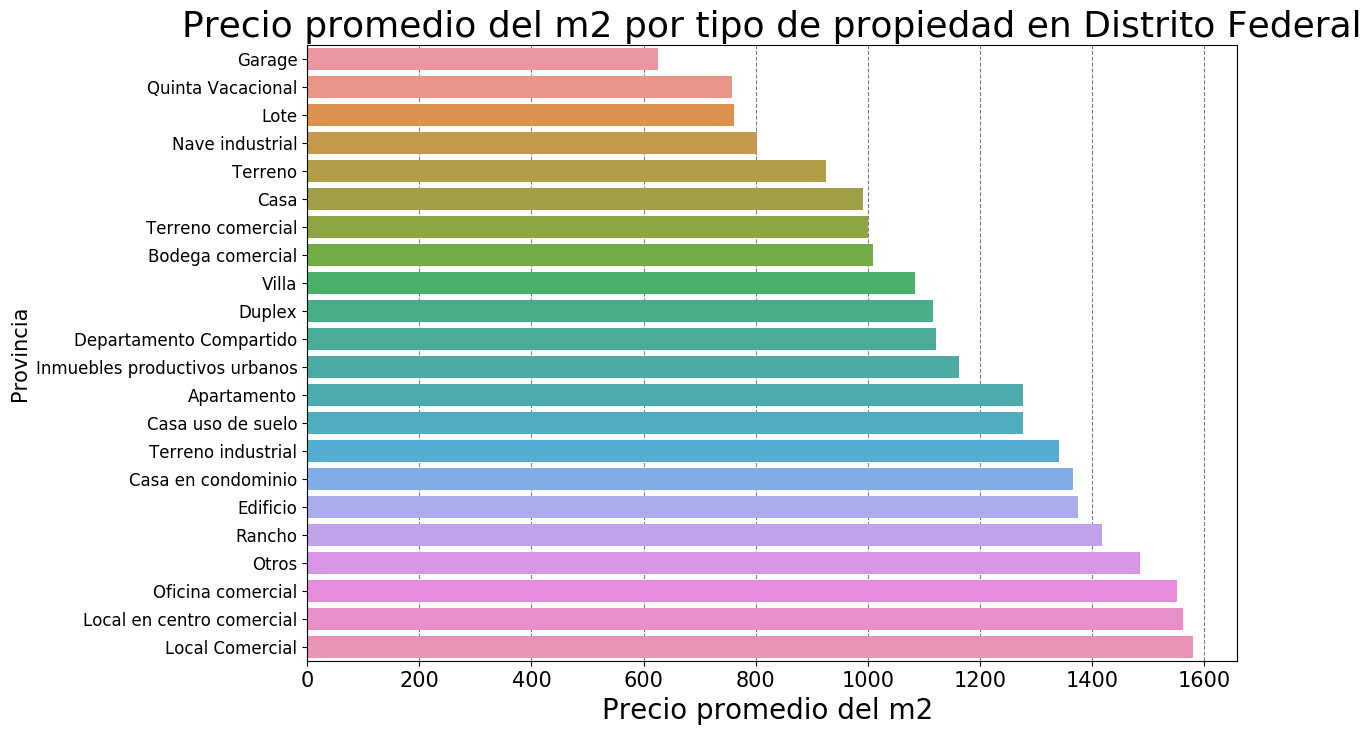

In [70]:
ax = sns.barplot(y=disfed_m2_tipo.index, x=disfed_m2_tipo.preciom2usd, order=disfed_m2_tipo.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Precio promedio del m2 ', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('Precio promedio del m2 por tipo de propiedad en Distrito Federal', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

Podemos ver que los comerciales son lo mas caro de distrito federal, son pocos pero son lo mas caro

In [71]:
comerciales = ["Local Comercial","Local en centro comercial","Bodega comercial","Terreno comercial","Oficina comercial"]
disfed_comerciales = disfed[disfed["tipodepropiedad"].transform(lambda x: x.isin(comerciales))]
disfed_filter = disfed[~(disfed.ciudad.isnull())]
disfed_filter['ciudad-provincia'] = disfed_filter[['ciudad', 'provincia']].apply(lambda x: ', '.join(x), axis=1)
disfed_agrupado_por_ciudad = disfed_filter.groupby("ciudad-provincia").agg({"escuelascercanas":"sum"}).sort_values(by="escuelascercanas",ascending=False).head(15)

/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


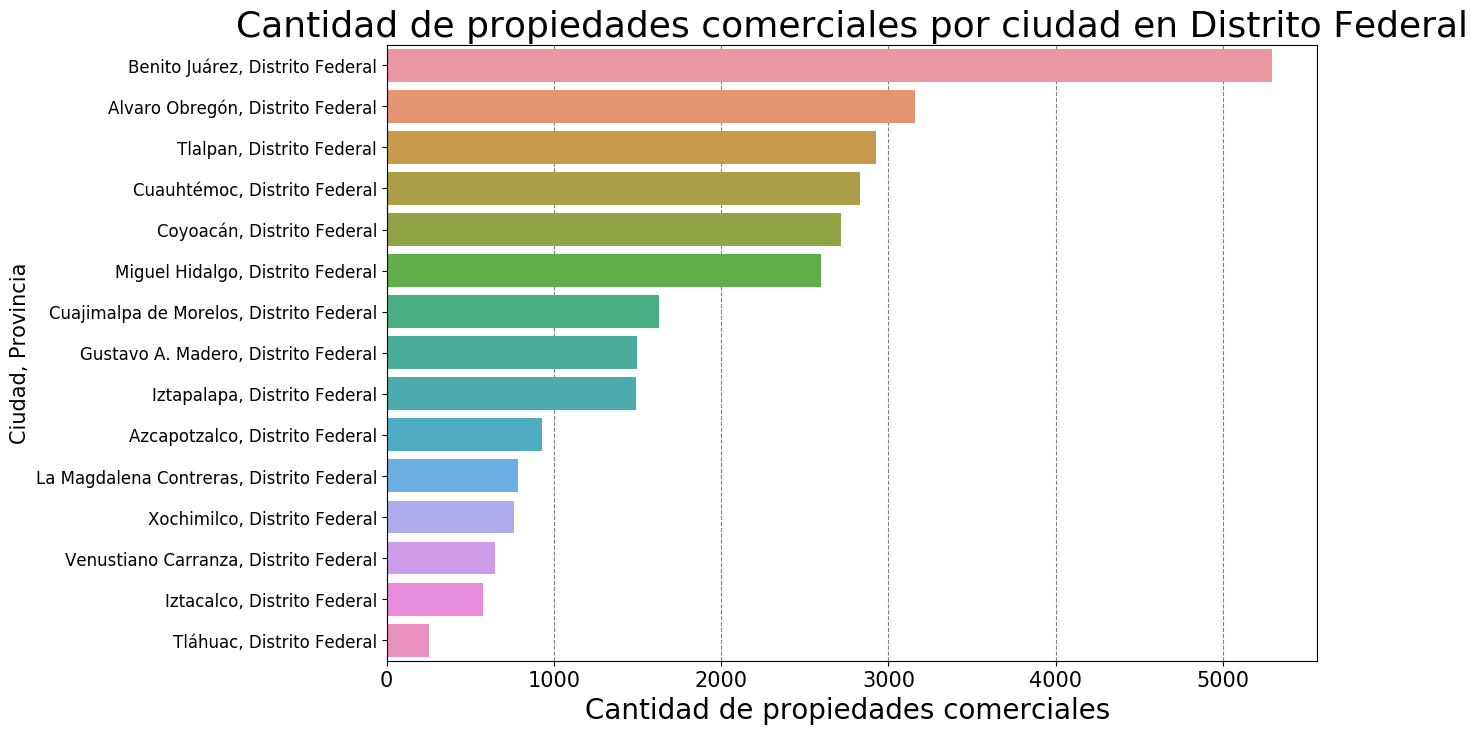

In [76]:
ax = sns.barplot(y=disfed_agrupado_por_ciudad.index, x=disfed_agrupado_por_ciudad.escuelascercanas, order=disfed_agrupado_por_ciudad.index)
ax.set_ylabel('Ciudad, Provincia', fontsize=15)
ax.set_xlabel('Cantidad de propiedades comerciales ', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('Cantidad de propiedades comerciales por ciudad en Distrito Federal', fontsize=26);
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)